In [1]:
from flightForge import Environment, Motor, Rocket, Simulation, LivePlotter, Parachute
from dotenv import load_dotenv
import os
import datetime

-------ENVIRONMENT INFO --------
Coordinates:   39.3897, -8.288964
Model Used:    iconEu
Surface Wind:  U=-3.73 m/s, V=-2.12 m/s
               Mag=4.29 m/s
--------------------------------


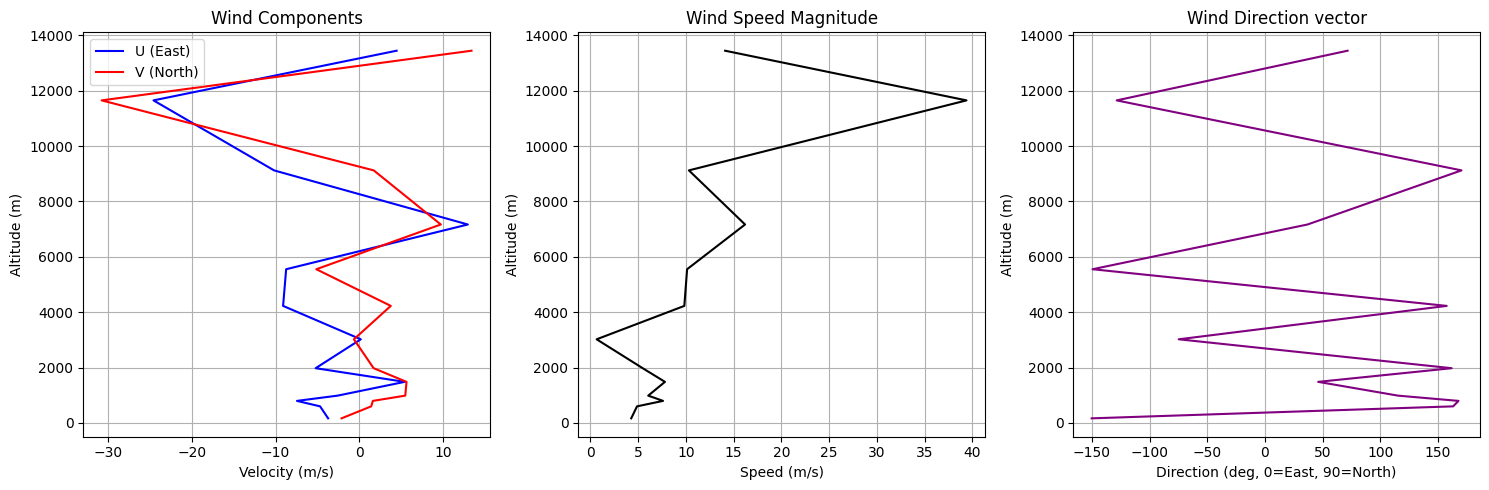

In [2]:
load_dotenv()
api_key = os.environ.get("API_KEY")
env = Environment(e_log=True)
tomorrow = datetime.date.today() + datetime.timedelta(days=1)
date_info = (tomorrow.day, tomorrow.month, tomorrow.year)
env.set_model(api_key=api_key, model="iconEu", lat=39.389700, lon=-8.288964, date=date_info)

In [4]:
motor = Motor("curves/thrust(2).csv", 4.2, ox_mdot=1.5, initial_ox_mass=7.33, initial_grain_mass=3, e_log=True)

------- MOTOR INFO --------
Initial Oxidizer Mass: 7.33 kg
Oxidizer Mass Flow:    1.50 kg/s
Initial Grain Mass:    3.00 kg
Total Impulse:         14543.04 Ns
Peak Thrust:           3530.84 N
Eff. Exhaust Vel (Ve): 1407.84 m/s
------------------------------------


In [5]:
rocket = Rocket(40.8, "curves/MaCd.csv", 0.163)
rocket.add_parachute(Parachute("drogue", 0.7354, 1, "apogee"))
rocket.add_parachute(Parachute("main", 13.8991, 1, 450))
rocket.add_motor(motor)

In [6]:
sim = Simulation(env, rocket, 12, 84, 144, e_log=True) 

-------------------------------------------
Event rail_departure at 0.78 s
Pos: (-1.01, 0.74, 11.93) m
Vel: (-3.11, 2.26, 36.53) m/s
Mass: 49.54 kg
-------------------------------------------
-------------------------------------------
Event burn_out at 4.20 s
Pos: (-25.74, 88.61, 500.63) m
Vel: (-12.52, 52.69, 254.94) m/s
Mass: 41.01 kg
-------------------------------------------
-------------------------------------------
Event apogee at 26.29 s
Pos: (-253.45, 1083.20, 3155.72) m
Vel: (-9.06, 39.88, 0.00) m/s
Mass: 40.99 kg
-------------------------------------------
drogue deployed at: 26.29 s
main deployed at: 112.60 s
-------------------------------------------
Event impact at 177.47 s
Pos: (-193.73, 862.92, 0.00) m
Vel: (-2.12, -3.73, -6.70) m/s
Mass: 40.99 kg
-------------------------------------------


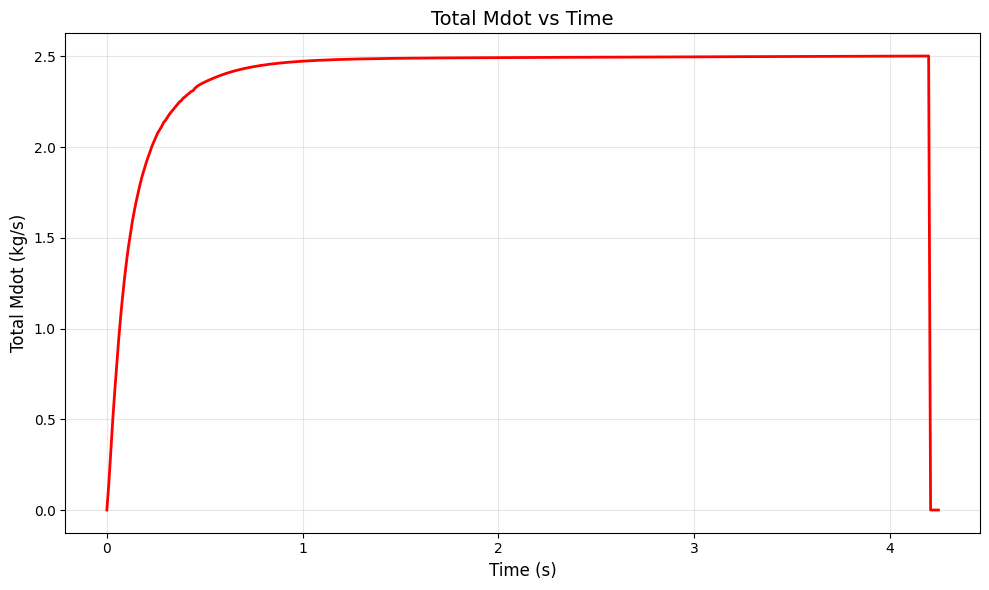

In [ ]:
motor.t

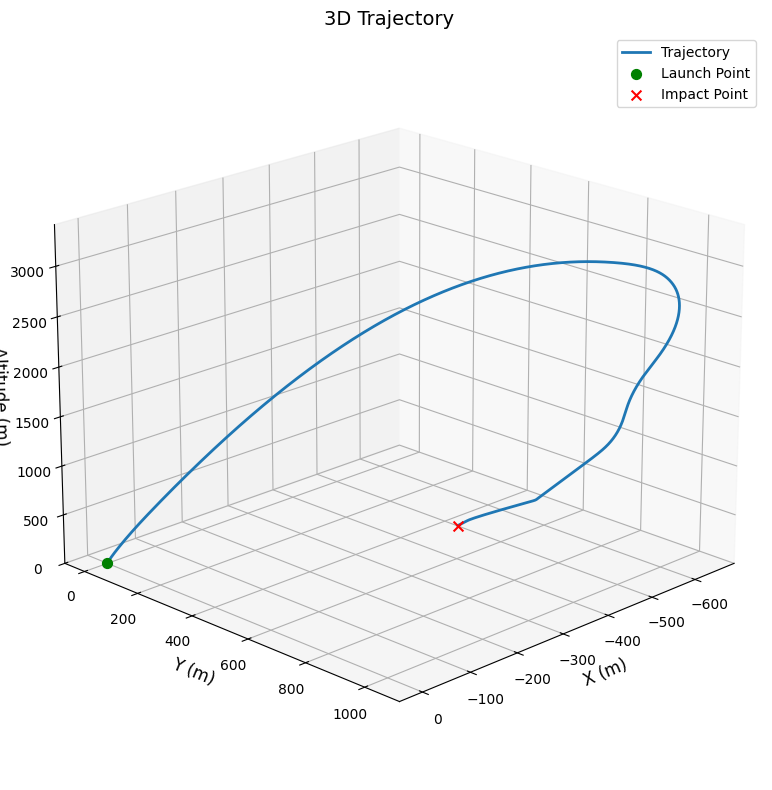

In [ ]:
sim.results.trajectory_3d()

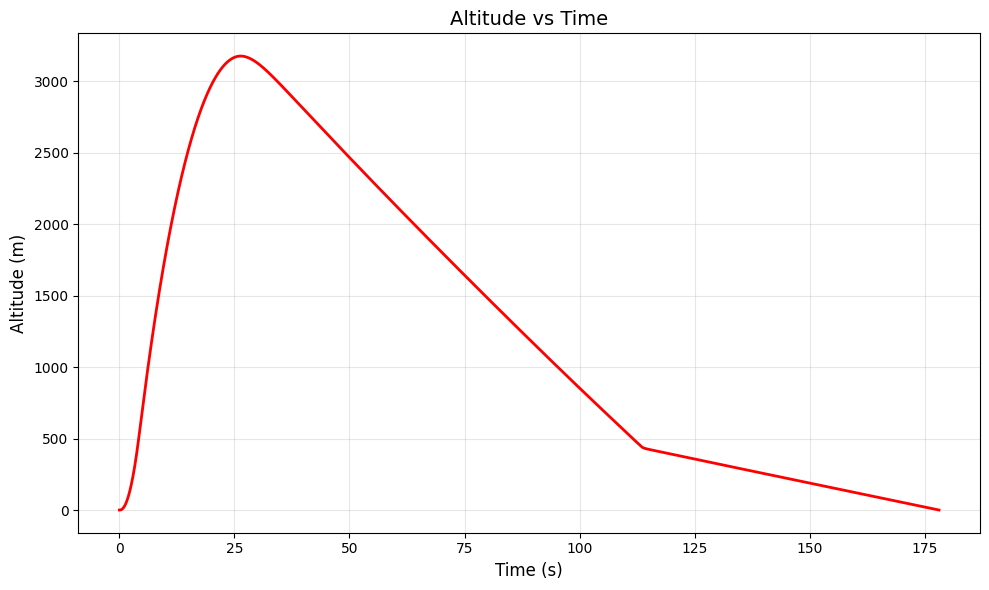

In [ ]:
sim.results.z()

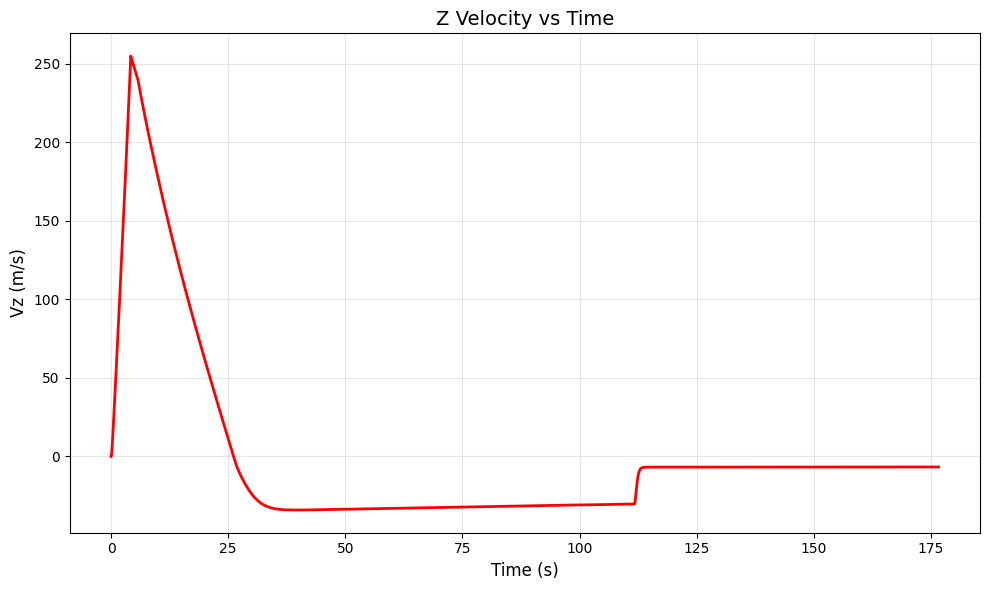

In [ ]:
sim.results.vz()

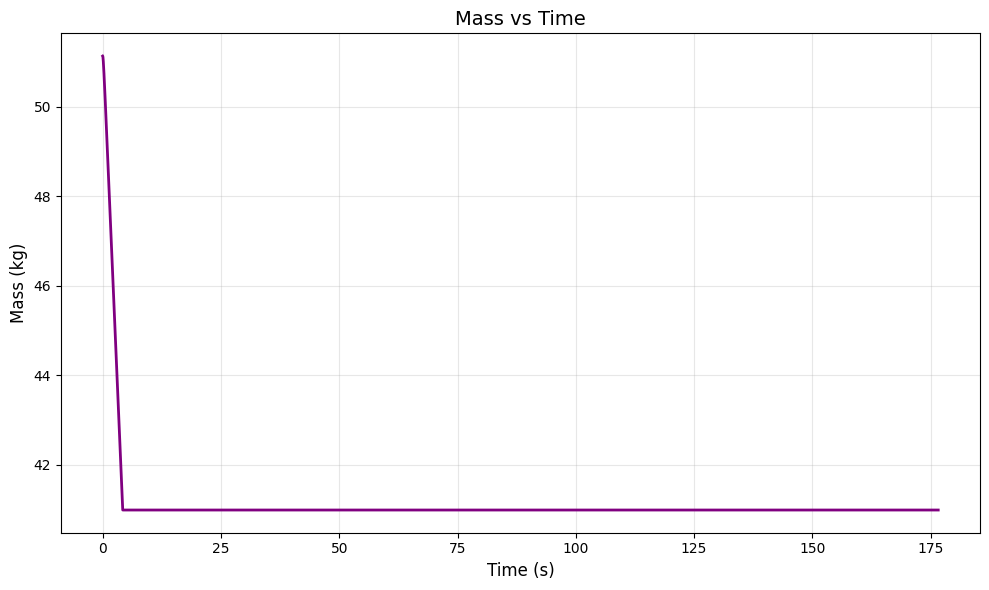

In [ ]:
sim.results.m()

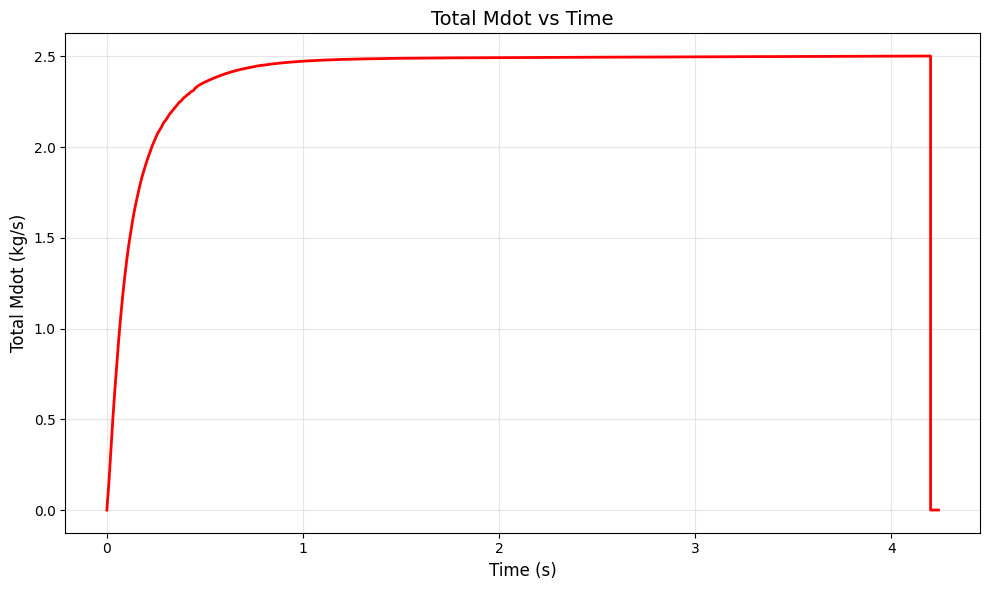

In [ ]:
sim.results.total_mdot()

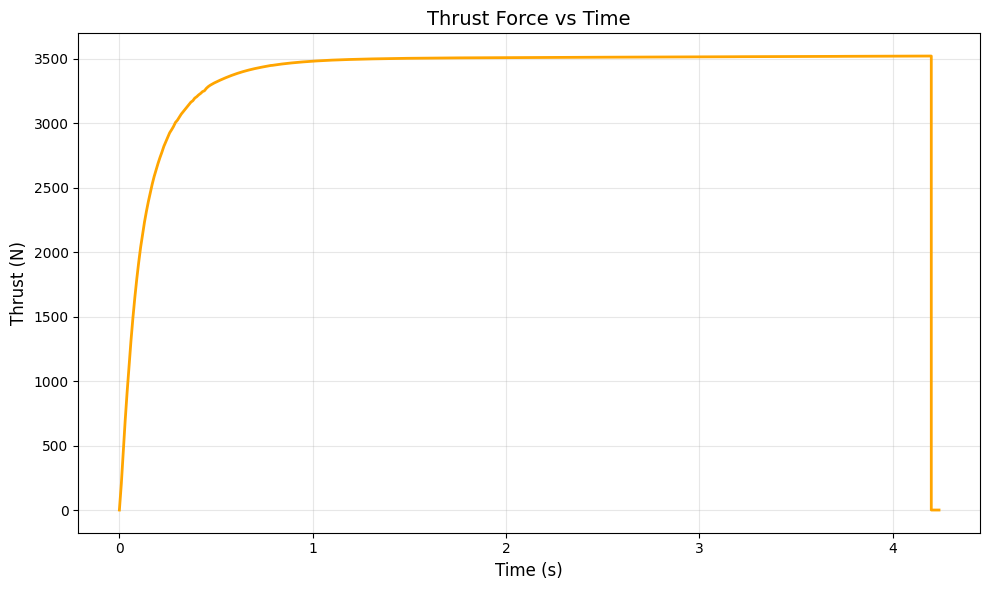

In [ ]:
sim.results.thrust()

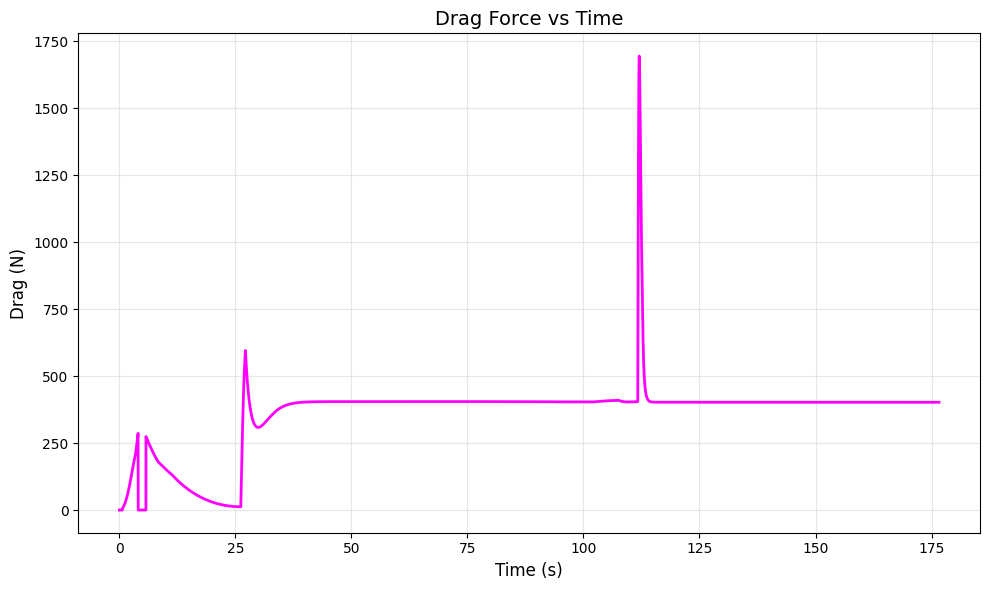

In [ ]:
sim.results.drag()

More features:

```python
sim.results.x(),
            .y()
            .z()
            .vx()
            .vy()
            .vz()
            .speed() (#magnitude)
            .ax
            .ay
            .az
            .acceleration (#magnitude)
            .m()
            .thrust()
            .drag()
            .grain_mdot()
            .total_mdot()

```